In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np

In [3]:
df = pd.read_csv('c:/Users/15623/Desktop/DSC106/projects/project 2/allegations_202007271729.csv')
df

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


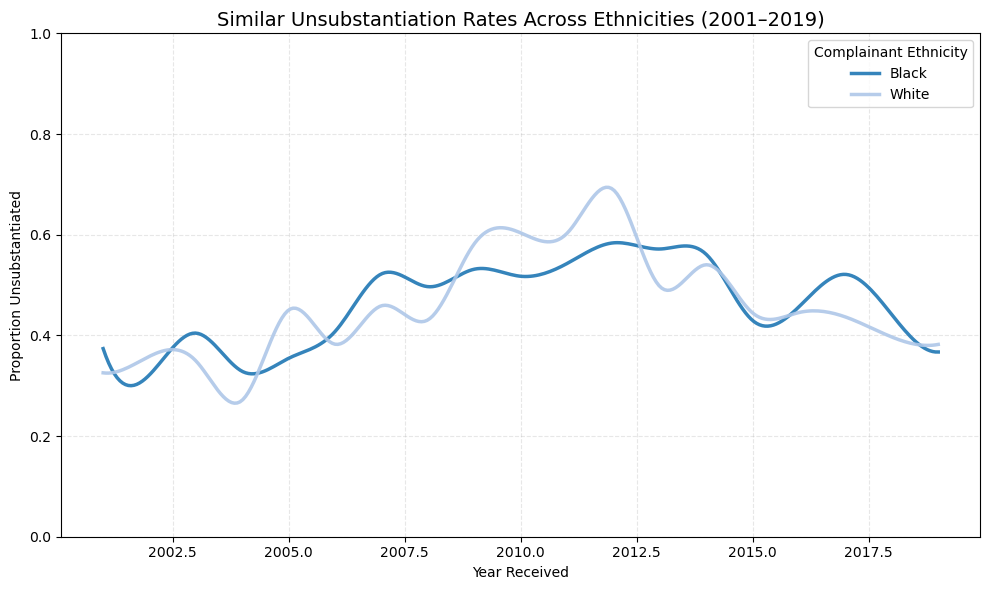

In [5]:

# Filter and compute
df_against = df.copy()
df_against = df_against[df_against['complainant_ethnicity'].isin(['Black', 'White'])]
df_against['isnt_substantiated'] = df_against['board_disposition'].str.contains('Unsubstantiated', case=False, na=False)

substantiation_by_year = (
    df_against.groupby(['year_received', 'complainant_ethnicity'])['isnt_substantiated']
    .mean()
    .reset_index()
)

# Pivot and smooth
pivot = substantiation_by_year.pivot(index='year_received', columns='complainant_ethnicity', values='isnt_substantiated')
pivot = pivot.loc[2001:2019].dropna()
x = pivot.index.values
x_smooth = np.linspace(x.min(), x.max(), 300)

def smooth_line(y):
    spline = make_interp_spline(x, y, k=3)
    return spline(x_smooth)

plt.figure(figsize=(10, 6))

# Plot smooth lines
plt.plot(x_smooth, smooth_line(pivot['Black']), label='Black', color='#1f77b4', linewidth=2.5, alpha=0.9)
plt.plot(x_smooth, smooth_line(pivot['White']), label='White', color='#aec7e8', linewidth=2.5, alpha=0.9)

# Emphasize unity
plt.title('Similar Unsubstantiation Rates Across Ethnicities (2001–2019)', fontsize=14)
plt.xlabel('Year Received')
plt.ylabel('Proportion Unsubstantiated')
plt.ylim(0, 1)  # Full range flattens difference
plt.legend(title='Complainant Ethnicity')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=[substantiation_by_year['year_received'].isin(range(2000,2020))],
    x='year_received',
    y='isnt_substantiated',
    hue='complainant_ethnicity',
    marker='o',
    palette='coolwarm'
)

plt.title('Unsubstantiation Rate by Complainant Ethnicity Over Time')
plt.xlabel('Year Received')
plt.ylabel('Proportion Unsubstantiated')
plt.ylim(0, 1)
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()

In [45]:
df['complainant_ethnicity'].unique()

array(['Black', nan, 'White', 'Asian', 'Refused', 'Hispanic', 'Unknown',
       'Other Race', 'American Indian'], dtype=object)

C:\Users\15623\AppData\Local\Temp\ipykernel_20612\2374880534.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


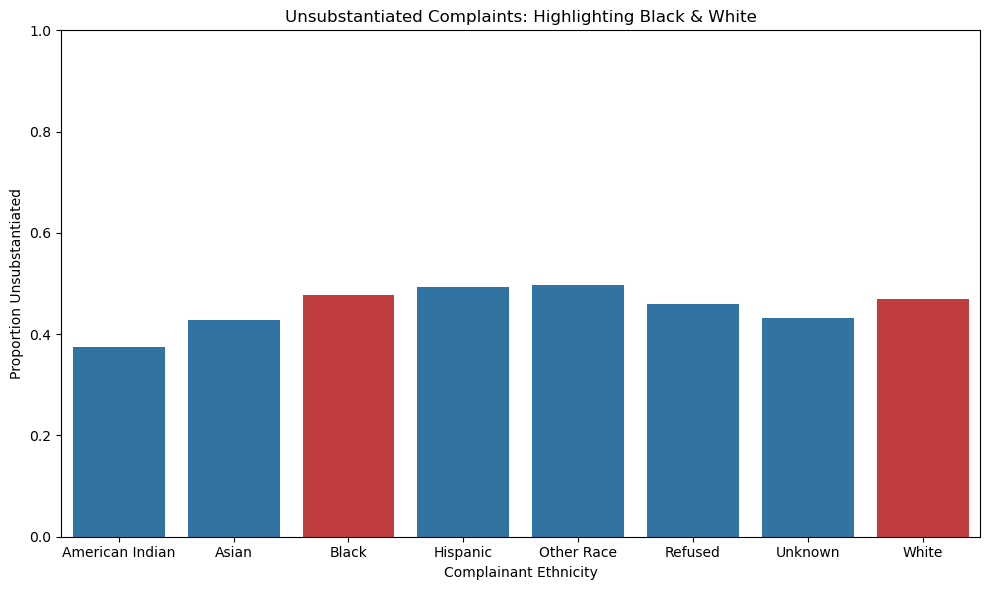

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lowercase board disposition for uniformity
df['board_disposition'] = df['board_disposition'].str.lower()

# Mark unsubstantiated complaints
df['isnt_substantiated'] = df['board_disposition'].str.contains('unsubstantiated', na=False)

# Filter to selected ethnicities and calculate mean
ethnicities_order = ['White', 'Black', 'American Indian']
filtered_df = df[df['complainant_ethnicity'].isin(ethnicities_order)]

substantiated_rate = (
    filtered_.groupby('complainant_ethnicity')['isnt_substantiated']
    .mean()
    #.reindex(ethnicities_order)  # ensure correct order
    .reset_index()
)

# Set custom colors: same for White & Black, different for others
custom_colors = ['#1f77b4', '#1f77b4', '#d62728', '#1f77b4', '#1f77b4', '#1f77b4','#1f77b4','#d62728']  # Gray, Blue, Blue, Red

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='complainant_ethnicity',
    y='isnt_substantiated',
    data=substantiated_rate,
    palette=custom_colors
)

plt.title("Unsubstantiated Complaints: Highlighting Black & White")
plt.ylabel("Proportion Unsubstantiated")
plt.xlabel("Complainant Ethnicity")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

C:\Users\15623\AppData\Local\Temp\ipykernel_20312\2953309445.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='complainant_ethnicity', y='isnt_substantiated', data=substantiated_rate[substantiated_rate['complainant_ethnicity'].isin(['American Indian', 'Asian', 'White', 'Black'])], palette=custom_colors)


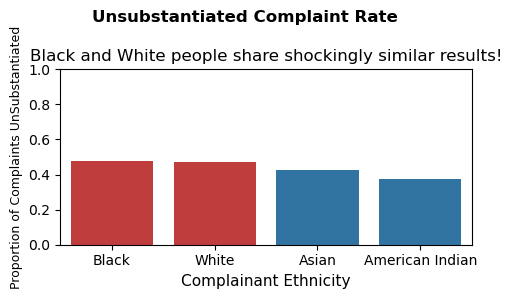

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame — assuming it's already cleaned and named `df`

# Normalize disposition to lowercase for easy filtering
df['board_disposition'] = df['board_disposition'].str.lower()

# Filter substantiated complaints
df['isnt_substantiated'] = df['board_disposition'].str.contains('unsubstantiated', na=False)

# Group by complainant ethnicity and calculate substantiation rate
substantiated_rate = (
    df.groupby('complainant_ethnicity')['isnt_substantiated']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
#df['ethnicity'] = df['ethnicity'].isin(['White', 'Black'])
# Plot
custom_colors= ['#d62728', '#d62728', '#1f77b4', '#1f77b4']

plt.figure(figsize=(5, 3))
sns.barplot(x='complainant_ethnicity', y='isnt_substantiated', data=substantiated_rate[substantiated_rate['complainant_ethnicity'].isin(['American Indian', 'Asian', 'White', 'Black'])], palette=custom_colors)
plt.suptitle("Unsubstantiated Complaint Rate", fontweight="bold")
plt.title("Black and White people share shockingly similar results!")
plt.ylabel("Proportion of Complaints UnSubstantiated", fontsize=9)
plt.xlabel("Complainant Ethnicity", fontsize=11)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

C:\Users\15623\AppData\Local\Temp\ipykernel_11708\1461501723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='complainant_ethnicity', y='is_substantiated', data=substantiated_sorted, palette='Greens')


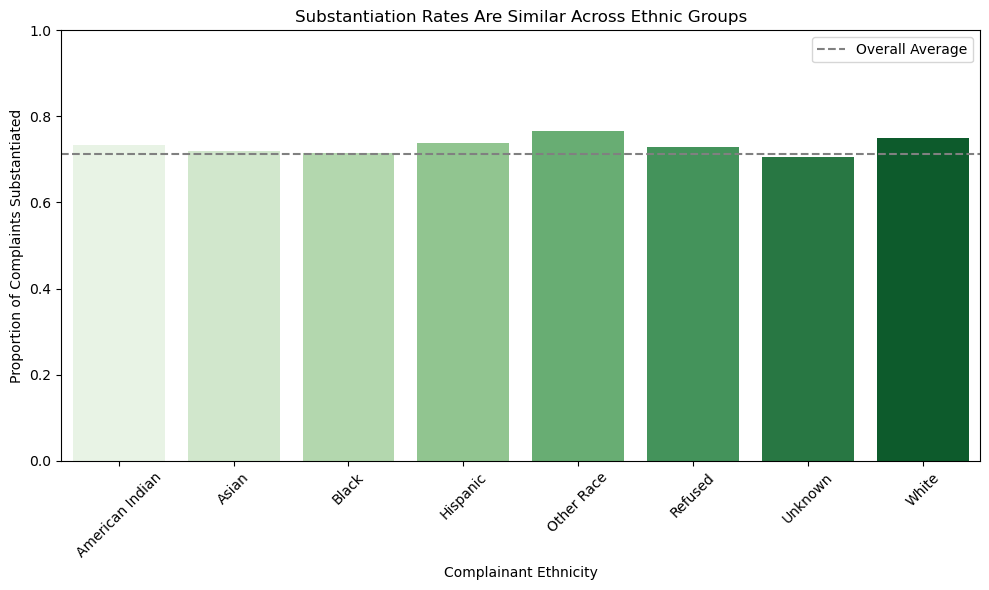

In [7]:
substantiated_sorted = substantiated_rate.sort_values('complainant_ethnicity')

plt.figure(figsize=(10, 6))
sns.barplot(x='complainant_ethnicity', y='is_substantiated', data=substantiated_sorted, palette='Greens')

plt.title("Substantiation Rates Are Similar Across Ethnic Groups")
plt.ylabel("Proportion of Complaints Substantiated")
plt.xlabel("Complainant Ethnicity")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.axhline(df['is_substantiated'].mean(), linestyle='--', color='gray', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\15623\AppData\Local\Temp\ipykernel_11708\2892075832.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arrest['Arrest Category'] = df_arrest['outcome_description'].apply(classify_outcome)


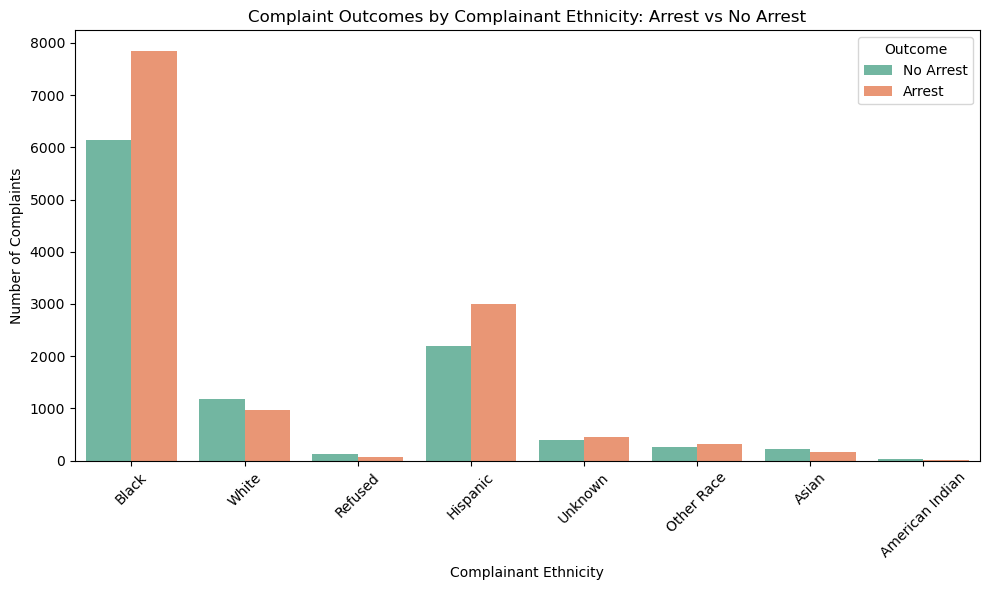

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize columns
df['complainant_ethnicity'] = df['complainant_ethnicity'].str.title()
df['outcome_description'] = df['outcome_description'].str.lower()

# Filter rows with either 'no arrest' or 'arrest'
df_arrest = df[df['outcome_description'].str.contains('arrest', na=False)]

# Create new column: Arrest or No Arrest
def classify_outcome(desc):
    if 'no arrest' in desc:
        return 'No Arrest'
    elif 'arrest' in desc:
        return 'Arrest'
    else:
        return 'Other'

df_arrest['Arrest Category'] = df_arrest['outcome_description'].apply(classify_outcome)

# Filter only Arrest or No Arrest outcomes
df_arrest_filtered = df_arrest[df_arrest['Arrest Category'].isin(['Arrest', 'No Arrest'])]

# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_arrest_filtered,
    x='complainant_ethnicity',
    hue='Arrest Category',
    palette='Set2'
)

plt.title('Complaint Outcomes by Complainant Ethnicity: Arrest vs No Arrest')
plt.xlabel('Complainant Ethnicity')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

#shows number of arrest in outcome description vs no arrest in outcome description by ethnicity

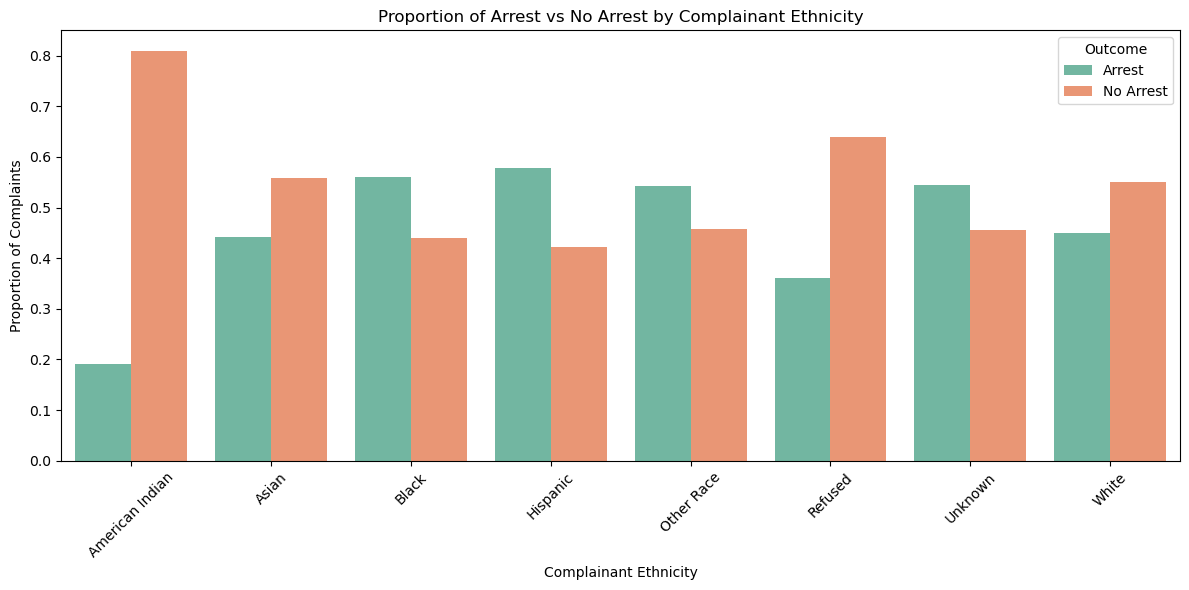

0        No Arrest
3        No Arrest
4           Arrest
5        No Arrest
10       No Arrest
           ...    
33344    No Arrest
33348    No Arrest
33349    No Arrest
33350    No Arrest
33351    No Arrest
Name: Arrest Category, Length: 27298, dtype: object

In [28]:

# Group and calculate proportions
counts = (
    df_arrest_filtered
    .groupby(['complainant_ethnicity', 'Arrest Category'])
    .size()
    .reset_index(name='Count')
)

# Normalize by ethnicity group
total_counts = counts.groupby('complainant_ethnicity')['Count'].transform('sum')
counts['Proportion'] = counts['Count'] / total_counts

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=counts,
    x='complainant_ethnicity',
    y='Proportion',
    hue='Arrest Category',
    palette='Set2'
)

plt.title('Proportion of Arrest vs No Arrest by Complainant Ethnicity')
plt.xlabel('Complainant Ethnicity')
plt.ylabel('Proportion of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()
df_arrest['Arrest Category']

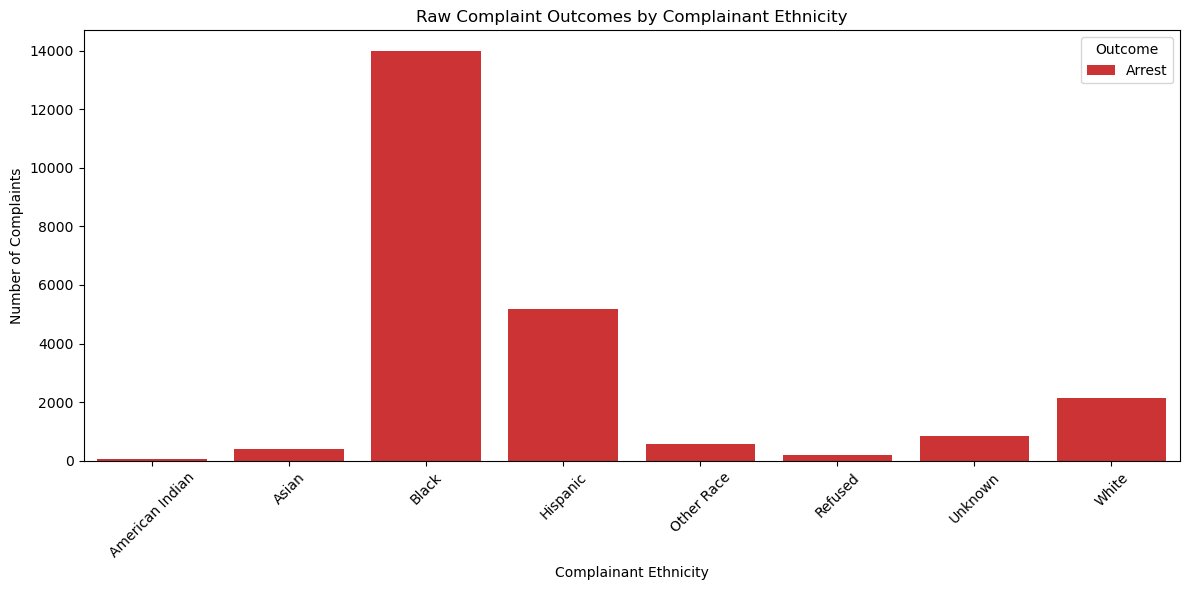

In [17]:
# Classify arrest-related outcomes again (in case fresh start)
def classify_outcome(desc):
    if pd.isnull(desc):
        return 'Unknown'
    elif 'arrest' in desc.lower():
        return 'Arrest'
    elif 'no arrest' in desc.lower():
        return 'No Arrest'
    else:
        return 'Other'

# Start with a fresh copy
df_counts = df.copy()
df_counts['Arrest Category'] = df_counts['outcome_description'].apply(classify_outcome)

# Focus only on Arrest/No Arrest and drop missing race
df_counts_filtered = df_counts[df_counts['Arrest Category'].isin(['Arrest', 'No Arrest'])]
df_counts_filtered = df_counts_filtered[df_counts_filtered['complainant_ethnicity'].notna()]

# Count number of complaints per group
grouped_counts = (
    df_counts_filtered
    .groupby(['complainant_ethnicity', 'Arrest Category'])
    .size()
    .reset_index(name='Count')
)

# Plot raw counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_counts,
    x='complainant_ethnicity',
    y='Count',
    hue='Arrest Category',
    palette='Set1'
)

plt.title('Raw Complaint Outcomes by Complainant Ethnicity')
plt.xlabel('Complainant Ethnicity')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

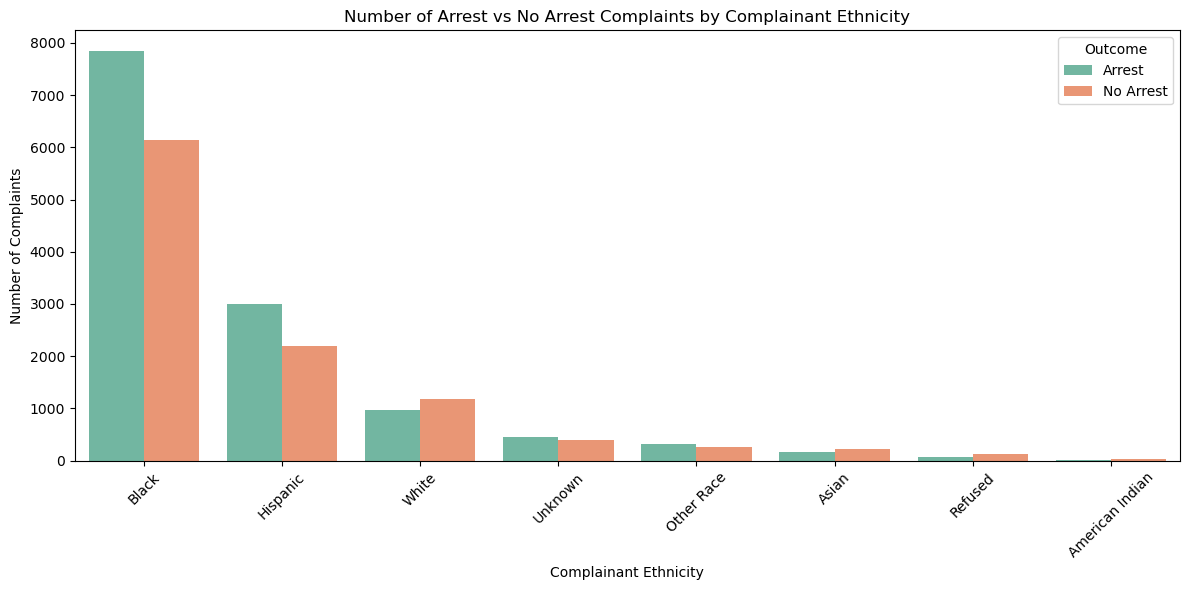

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the existing 'df_arrest_filtered' and 'Arrest Category'

# Group by outcome and race (absolute counts, not proportions)
arrest_outcome_counts = (
    df_arrest_filtered
    .groupby(['Arrest Category', 'complainant_ethnicity'])
    .size()
    .reset_index(name='Count')
)

# Sort complainant_ethnicity for consistent order if desired
eth_order = df_arrest_filtered['complainant_ethnicity'].value_counts().index.tolist()
arrest_outcome_counts['complainant_ethnicity'] = pd.Categorical(
    arrest_outcome_counts['complainant_ethnicity'],
    categories=eth_order,
    ordered=True
)

# Plot raw counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=arrest_outcome_counts,
    x='complainant_ethnicity',
    y='Count',
    hue='Arrest Category',
    palette='Set2'
)

plt.title('Number of Arrest vs No Arrest Complaints by Complainant Ethnicity')
plt.xlabel('Complainant Ethnicity')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

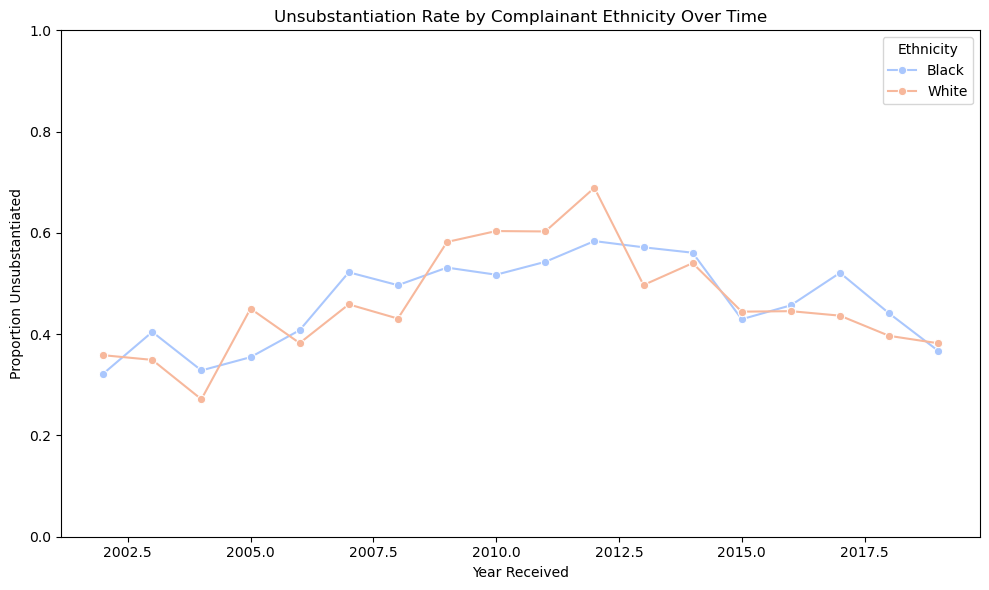

In [61]:
df = pd.read_csv('c:/Users/15623/Desktop/DSC106/projects/project 2/allegations_202007271729.csv')


df_sub = df.copy()
df_sub = df_sub[df_sub['complainant_ethnicity'].isin(['Black', 'White'])]

# Label substantiated outcomes
df_sub['isnt_substantiated'] = df_sub['board_disposition'].str.contains('Unsubstantiated', case=False, na=False)

# Group by year and ethnicity
substantiation_by_year = (
    df_sub.groupby(['year_received', 'complainant_ethnicity'])['isnt_substantiated']
    .mean()
    .reset_index()
)

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=substantiation_by_year[substantiation_by_year['year_received'].isin(range(2002,2020))],
    x='year_received',
    y='isnt_substantiated',
    hue='complainant_ethnicity',
    marker='o',
    palette='coolwarm'
)

plt.title('Unsubstantiation Rate by Complainant Ethnicity Over Time')
plt.xlabel('Year Received')
plt.ylabel('Proportion Unsubstantiated')
plt.ylim(0, 1)
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()

In [60]:
df['complainant_ethnicity'].unique()

array(['Black', nan, 'White', 'Asian', 'Refused', 'Hispanic', 'Unknown',
       'Other Race', 'American Indian'], dtype=object)

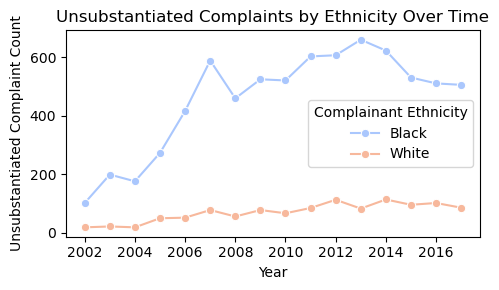

In [65]:
df = pd.read_csv('c:/Users/15623/Desktop/DSC106/projects/project 2/allegations_202007271729.csv')

# Filter to only Black and White complainants
df_counts = df[df['complainant_ethnicity'].isin(['Black', 'White'])].copy()

# Label whether each complaint is unsubstantiated
df_counts['is_unsubstantiated'] = df_counts['board_disposition'].str.contains('Unsubstantiated', case=False, na=False)

# Group by year and ethnicity, summing unsubstantiated complaints
unsubstantiated_counts = (
    df_counts[df_counts['year_received'].between(2002, 2017)]
    .groupby(['year_received', 'complainant_ethnicity'])['is_unsubstantiated']
    .sum()
    .reset_index()
)

# Line plot of raw counts
plt.figure(figsize=(5, 3))
sns.lineplot(
    data=unsubstantiated_counts,
    x='year_received',
    y='is_unsubstantiated',
    hue='complainant_ethnicity',
    marker='o',
    palette='coolwarm'
)

plt.title('Unsubstantiated Complaints by Ethnicity Over Time')
plt.xlabel('Year')
plt.ylabel('Unsubstantiated Complaint Count')
plt.legend(title='Complainant Ethnicity')
plt.tight_layout()
plt.show()

C:\Users\15623\AppData\Local\Temp\ipykernel_11708\1839707851.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


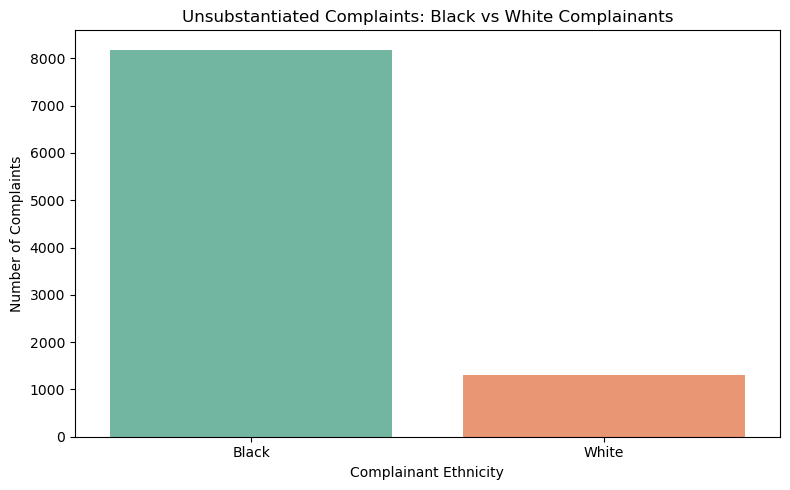

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for unsubstantiated complaints with non-missing ethnicity
subst_df = df[
    df['board_disposition'].str.contains('Unsubstantiated', case=False, na=False) &
    df['complainant_ethnicity'].notna()
]

# Keep only Black and White complainants
filtered_df = subst_df[subst_df['complainant_ethnicity'].str.lower().isin(['black', 'white'])]

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(
    data=filtered_df,
    x='complainant_ethnicity',
    palette='Set2'
)

plt.title('Unsubstantiated Complaints: Black vs White Complainants')
plt.xlabel('Complainant Ethnicity')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()